# Initialization

In [45]:
import requests
import base64
from PIL import Image
import numpy as np
from io import BytesIO
import cv2

In [46]:
def draw_bounding_box(image,detected_boxes):
    # Convert to numpy
    image = np.array(image)  # RGB format
    
    # Draw boxes
    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
    # Display
    import matplotlib.pyplot as plt
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Object Detector Service

In [53]:
# Load and encode the image to base64
image_path = "Picture1.png"  # path to your test image
with open(image_path, "rb") as image_file:
    image_bytes = image_file.read()
    image_base64 = base64.b64encode(image_bytes).decode("utf-8")

# Construct JSON payload
payload = {
    "image_base64": image_base64
}

# Send POST request to the FastAPI endpoint
response = requests.post("http://127.0.0.1:8000/object-detector", json=payload)
detection_item = response.json()
detection_item

{'scores': [0.9994865655899048,
  0.9997661709785461,
  0.998729407787323,
  0.9900616407394409,
  0.9978457689285278],
 'labels': ['bottom', 'shoes', 'shoes', 'top', 'outer'],
 'bboxes': [[74.56291961669922,
   125.98009490966797,
   145.59275817871094,
   226.89845275878906],
  [47.685306549072266,
   224.52554321289062,
   85.56348419189453,
   250.51779174804688],
  [118.46952056884766,
   224.30911254882812,
   150.08099365234375,
   246.84317016601562],
  [87.33873748779297,
   65.51183319091797,
   129.70834350585938,
   130.47650146484375],
  [75.97189331054688,
   37.23505783081055,
   157.59194946289062,
   125.77684783935547]]}

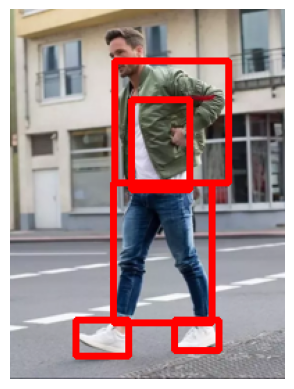

In [54]:
draw_bounding_box(Image.open("Picture1.png").convert("RGB"),detection_item["bboxes"])

# Image-to-Image Retrieval

In [83]:
# Construct JSON payload
payload = {
    "image_base64": image_base64,
    "items":detection_item
}
k=1
# Send POST request to the FastAPI endpoint
response = requests.post(f"http://127.0.0.1:8000/image-retrieval?k={k}", json=payload)
retrieval_output = response.json()
retrieval_output

{'retrieved_image_paths': ['image_database/me.png',
  'image_database/Bond Forger.png',
  'image_database/me.png',
  'image_database/me.png',
  'image_database/me.png'],
 'detected_labels': ['bottom', 'shoes', 'shoes', 'top', 'outer'],
 'similarity_scores': [0.6392, 0.5421, 0.5699, 0.669, 0.6166]}

# Fashion Analysis

In [84]:
# Construct JSON payload
payload = {
    "image": {"image_base64": image_base64},
    "data": retrieval_output
}

# Query param
params = {"user_query": "I want something stylish, something glamour?"}

# Send request
response = requests.post(
    "http://127.0.0.1:8000/response-generation-fasion-advisor",
    params=params,
    json=payload
)

print(response.json())

{'response': "## Analysis of the User's Outfit\n\nThe user has provided a photo of themselves wearing an outfit and has expressed a desire for something stylish and glamorous.\n\n### Outfit Details\n\n*   The user is wearing:\n    *   A green bomber jacket\n    *   A white T-shirt\n    *   Blue jeans\n    *   White sneakers\n\n### Evaluation\n\n*   **Clothing Style:** The user's outfit appears to be casual and comfortable, with a sporty touch from the bomber jacket and sneakers.\n*   **Silhouette:** The silhouette of the outfit is relaxed, with a loose fit on the jacket and jeans.\n*   **Color Coordination:** The colors are coordinated well, with the green jacket and white T-shirt creating a nice contrast. The blue jeans and white sneakers add a neutral touch to the outfit.\n*   **Layering:** The outfit features a single layer on top (the bomber jacket), which is suitable for a casual setting.\n*   **Accessories:** There are no visible accessories in the provided photo.\n*   **Fabric T